# Implementação do KNN com Numpy + Classificação Binária (sem normalização)

In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Lendo o dataframe:
df = pd.read_csv('winequality.csv', sep = ",")
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0


In [3]:
#Ja conseguimos ver das colunas que temos uma coluna nao desejada (a primeira - Unnamed), entao:
columnsToInclude = ['fixed acidity', 'volatile acidity', 'citric acid',
      'residual sugar', 'chlorides', 'free sulfur dioxide',
      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
      'quality', 'wine_is_red']
df = pd.read_csv('winequality.csv', sep = ",", usecols=columnsToInclude)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0


In [4]:
#Checando por valores nulos:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_is_red             0
dtype: int64

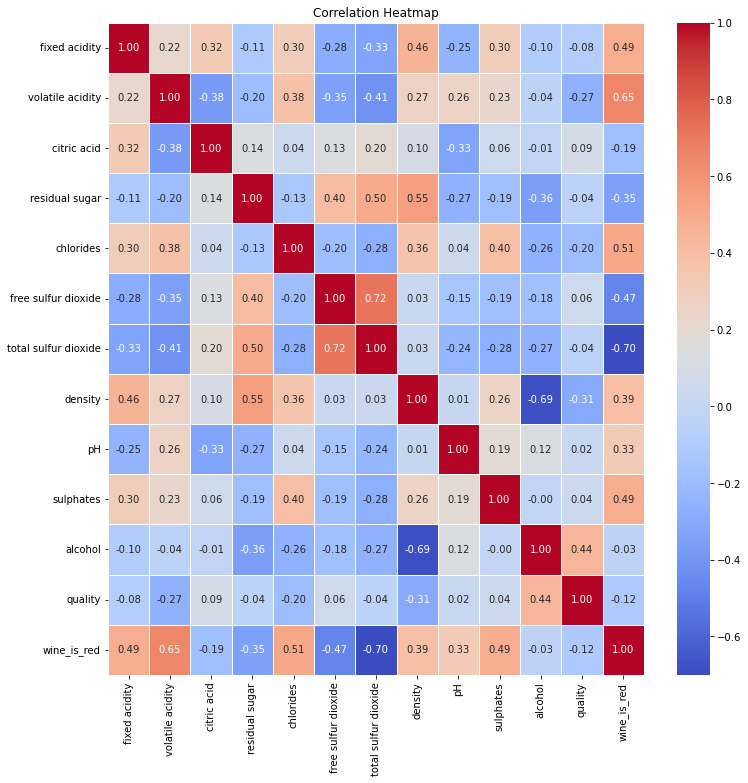

In [5]:
#Checando a correlação de varíaveis:
correlationMatrix = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
#Pegando o que queremos - vou tentar aplicar um KNN para prever se o vinho é tinto ou nao
x = df.iloc[:, 0:-1]#Todas as colunas menos wine_is_red
y = df.iloc [:, -1] #Pega so wine_is_red

In [7]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6


In [8]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: wine_is_red, dtype: int64

In [9]:
#Conversão de x e y para np arrays para que o código funcione apropriadamente:
x = x.to_numpy()
y = y.to_numpy()

In [10]:
x

array([[ 5.9 ,  0.61,  0.08, ...,  0.77, 11.1 ,  6.  ],
       [ 8.2 ,  1.  ,  0.09, ...,  0.55,  9.  ,  6.  ],
       [ 6.4 ,  0.24,  0.49, ...,  0.98, 10.5 ,  6.  ],
       ...,
       [ 7.9 ,  0.33,  0.28, ...,  0.38,  8.8 ,  6.  ],
       [ 7.  ,  0.3 ,  0.28, ...,  0.57, 11.4 ,  5.  ],
       [ 6.4 ,  0.22,  0.49, ...,  0.52, 10.1 ,  6.  ]])

In [11]:
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
#Calcula a deistancia euclidiana a partir da definicao
def euclideanDistance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

#Classe para abrigar tudo relacionado ao algoritimo do KNN
class KNN:
    #Inicializa a classe com o valor de vizinhos, (k = 3 valor padrao)
    def __init__(self, k=3):
        self.k = k
    
    #Coloca os valores de treinamento 
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    #Chama a funcao para as predictions
    def predict(self, X):
        predictions = [self._predict(dataPoint) for dataPoint in X]
        return predictions

    #Função auxiliar para calcular as predictions baseadas na distancia euclidiana (recebe apenas um dado por vez)
    def _predict(self, dataPoint):
        #Distancia
        distances = [euclideanDistance(dataPoint, dataPointTrain) for dataPointTrain in self.X_train]
    
        #Pega o vizinho mais proximo a partir do indice
        kIndices = np.argsort(distances)[:self.k] #Nos dá os indices dos valores ORIGINAIS no array antes do sort
        #(i.e. o primeiro valor do será o índice original do vizinho mais próximo)
        kNearestLabels = [self.y_train[i] for i in kIndices] #Pega o valores dos vizinhos a partir dos indices

        #Pegar o vizinho com mais aparições:
        counter = {} #Para ver qual vizinho é o mais comum

        #Ver o array como um todo e pegar os valores e suas aparições:
        for element in kNearestLabels:
            if element in counter:
                counter[element] += 1
            else:
                counter[element] = 1

        #Pegar o valor mais comum e suas aparições
        mostCommonElement = None
        mostCommonCount = 0

        for element, count in counter.items():
            if count > mostCommonCount:
                mostCommonElement = element
                mostCommonCount = count
            
        return mostCommonElement

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
k = np.int64(np.sqrt(X_test.shape[0])) #Valor ótimo de K
clf = KNN(k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [14]:
predictions[0:20]

[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [15]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.9384615384615385


# Classificação multiclasse analisando a qualidade do vinho (sem normalização)

In [16]:
#Realizamos a classificação binária + KNN para prever se o vinho seria tinto, agora vamos utilizar o mesmo algoritimo para 
#prever a sua qualidade realizando todos os procedimentos passados.

In [17]:
#Lendo o dataframe:
df = pd.read_csv('winequality.csv', sep = ",")
df.head()

#Ja conseguimos ver das colunas que temos uma coluna nao desejada (a primeira - Unnamed), entao:
columnsToInclude = ['fixed acidity', 'volatile acidity', 'citric acid',
      'residual sugar', 'chlorides', 'free sulfur dioxide',
      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
      'quality', 'wine_is_red']
df = pd.read_csv('winequality.csv', sep = ",", usecols=columnsToInclude)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0


In [18]:
x = df.drop(columns=['quality'])
y = df.iloc[:, 11] #Pega so quality

In [19]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_is_red
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,1
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,1
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,0
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,0
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,0


In [20]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [21]:
#Conversão de x e y para np arrays para que o código funcione apropriadamente:
x = x.to_numpy()
y = y.to_numpy()

In [22]:
x

array([[ 5.9 ,  0.61,  0.08, ...,  0.77, 11.1 ,  1.  ],
       [ 8.2 ,  1.  ,  0.09, ...,  0.55,  9.  ,  1.  ],
       [ 6.4 ,  0.24,  0.49, ...,  0.98, 10.5 ,  0.  ],
       ...,
       [ 7.9 ,  0.33,  0.28, ...,  0.38,  8.8 ,  0.  ],
       [ 7.  ,  0.3 ,  0.28, ...,  0.57, 11.4 ,  0.  ],
       [ 6.4 ,  0.22,  0.49, ...,  0.52, 10.1 ,  0.  ]])

In [23]:
y

array([6, 6, 6, ..., 6, 5, 6], dtype=int64)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
k = np.int64(np.sqrt(X_test.shape[0])) #Valor ótimo de K
clf = KNN(k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [25]:
predictions[0:20]

[5, 6, 5, 5, 5, 6, 5, 6, 5, 7, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5]

In [26]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.46892307692307694


Podemos ver que a acurácia com a classificação multiclasse é muito inferior quando comparada à binária quando utilizamos o KNN.
(Uma coisa interessante a ser pensada á a baixa correlação de "quality" com as outras variáveis quando analisamos o heatmap)

# Aplicação dos modelos com normalização de dados:

# Classificação binária normalizada

In [27]:
#Classificação binária:
#Lendo o dataframe:
df = pd.read_csv('winequality.csv', sep = ",")
df.head()

columnsToInclude = ['fixed acidity', 'volatile acidity', 'citric acid',
      'residual sugar', 'chlorides', 'free sulfur dioxide',
      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
      'quality', 'wine_is_red']
df = pd.read_csv('winequality.csv', sep = ",", usecols=columnsToInclude)


x = df.iloc[:, 0:-1]
y = df.iloc[:, -1] 


In [28]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6


In [29]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: wine_is_red, dtype: int64

In [30]:
x = x.to_numpy()
y = y.to_numpy()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#Normalizacao:
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)
X_train = (X_train - mu ) / sigma

mu = np.mean(X_test, 0)
sigma = np.std(X_test, 0)
X_test = (X_test - mu ) / sigma

In [32]:
X_train

array([[-1.01744466, -0.72598047, -0.95271754, ..., -0.21709637,
        -0.50056783, -0.9314208 ],
       [-1.47744393,  0.54330213, -1.43589094, ..., -0.34776454,
         0.58985101, -2.07216543],
       [ 0.36255313, -0.48421236,  0.01362928, ...,  0.17490814,
         0.25433752, -0.9314208 ],
       ...,
       [ 0.97588548,  0.72462822,  1.87729813, ...,  5.27096682,
        -1.08771644, -0.9314208 ],
       [ 0.05588695, -0.54465438, -0.40051936, ..., -1.06643948,
        -1.08771644, -0.9314208 ],
       [-0.25077922, -0.18200221,  0.01362928, ..., -0.5437668 ,
         0.75760775,  1.35006846]])

In [33]:
X_test

array([[-1.08541846, -0.17474136,  0.06511689, ...,  0.55252711,
         0.01936931,  0.2039891 ],
       [ 0.33040789, -0.11305901,  1.77070909, ...,  0.10819031,
        -1.06963913, -0.9550399 ],
       [-0.14153423, -1.16165902, -0.27600155, ..., -1.00265167,
        -1.23717889,  1.36301811],
       ...,
       [ 1.35294914, -0.23642372,  0.20156426, ..., -0.55831488,
         0.85706812,  1.36301811],
       [-0.06287721, -0.42147078, -0.07133049, ...,  0.25630258,
        -1.48848853, -0.9550399 ],
       [-0.53481933, -0.60651784, -0.54889631, ..., -1.00265167,
        -0.56701985, -0.9550399 ]])

In [34]:
k = np.int64(np.sqrt(X_test.shape[0])) #Valor ótimo de K
clf = KNN(k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [35]:
predictions[0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]

In [36]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.9876923076923076


# Classificação multiclasse normalizada:

In [37]:
#Lendo o dataframe:
df = pd.read_csv('winequality.csv', sep = ",")
df.head()

#Ja conseguimos ver das colunas que temos uma coluna nao desejada (a primeira - Unnamed), entao:
columnsToInclude = ['fixed acidity', 'volatile acidity', 'citric acid',
      'residual sugar', 'chlorides', 'free sulfur dioxide',
      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
      'quality', 'wine_is_red']
df = pd.read_csv('winequality.csv', sep = ",", usecols=columnsToInclude)

x = df.drop(columns=['quality'])
y = df.iloc[:, 11] #Pega so quality

x = x.to_numpy()
y = y.to_numpy()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)
X_train = (X_train - mu ) / sigma

mu = np.mean(X_test, 0)
sigma = np.std(X_test, 0)
X_test = (X_test - mu ) / sigma

k = np.int64(np.sqrt(X_test.shape[0])) #Valor ótimo de K
clf = KNN(k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [39]:
predictions[0:20]

[6, 6, 6, 5, 5, 7, 7, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 7, 6, 5]

In [40]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.5643076923076923


Podemos ver que tanto a normalização para a classificação binária como também para multiclasse deixou as acurácias melhores.

# Aplicação do Random Forest (não normalizado)

In [41]:
df = pd.read_csv('winequality.csv', sep = ",")

columnsToInclude = ['fixed acidity', 'volatile acidity', 'citric acid',
      'residual sugar', 'chlorides', 'free sulfur dioxide',
      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
      'quality', 'wine_is_red']
df = pd.read_csv('winequality.csv', sep = ",", usecols=columnsToInclude)

#Vamos precisar manter o formato original de x e y como data frames para o código funcionar:
xDf = df.drop(columns=['quality'])
yDf = df.iloc[:, 11] #Pega so quality

xNp = xDf.to_numpy()
yNp = yDf.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(xNp, yNp, test_size=0.25)

In [42]:
#Aplicação do modelo do random forest:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6898461538461539


In [43]:
# Análise de quais features são mais importantes:
feature_importance = rf_model.feature_importances_

# Trabalhamos com numpy arrays para fazer os calculos, entao precisamos converter para um df novamente
X_train_df = pd.DataFrame(X_train, columns=xDf.columns)

# Criação de um dataframe para analisar as features:
importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
10               alcohol    0.121724
7                density    0.102846
1       volatile acidity    0.098018
6   total sulfur dioxide    0.093427
5    free sulfur dioxide    0.088225
9              sulphates    0.085800
4              chlorides    0.085650
3         residual sugar    0.084716
8                     pH    0.083293
2            citric acid    0.078528
0          fixed acidity    0.074609
11           wine_is_red    0.003164


# Aplicação do Random Forest normalizado:

In [44]:
df = pd.read_csv('winequality.csv', sep = ",")

columnsToInclude = ['fixed acidity', 'volatile acidity', 'citric acid',
      'residual sugar', 'chlorides', 'free sulfur dioxide',
      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
      'quality', 'wine_is_red']
df = pd.read_csv('winequality.csv', sep = ",", usecols=columnsToInclude)

#Vamos precisar manter o formato original de x e y como data frames para o código funcionar:
xDf = df.drop(columns=['quality'])
yDf = df.iloc[:, 11] #Pega so quality

xNp = xDf.to_numpy()
yNp = yDf.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(xNp, yNp, test_size=0.25)

In [45]:
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)
X_train = (X_train - mu ) / sigma

mu = np.mean(X_test, 0)
sigma = np.std(X_test, 0)
X_test = (X_test - mu ) / sigma

In [46]:
#Aplicação do modelo do random forest:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6886153846153846


In [47]:
# Análise de quais features são mais importantes:
feature_importance = rf_model.feature_importances_

# Trabalhamos com numpy arrays para fazer os calculos, entao precisamos converter para um df novamente
X_train_df = pd.DataFrame(X_train, columns=xDf.columns)

# Criação de um dataframe para analisar as features:
importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
10               alcohol    0.119809
7                density    0.103025
1       volatile acidity    0.099193
6   total sulfur dioxide    0.091441
5    free sulfur dioxide    0.087945
9              sulphates    0.087571
4              chlorides    0.086595
3         residual sugar    0.084639
8                     pH    0.083200
2            citric acid    0.079571
0          fixed acidity    0.073783
11           wine_is_red    0.003227


Com isso podemos concluir que a normalização tem uma importância muito maior no algorítimo do KNN do que no Random Forest.